In [1]:
# Importing TensorFlow, which is the main deep learning framework we'll use
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [2]:
dataset, info = tfds.load(
 'cats_vs_dogs', # Name of the dataset
 split=['train[:80%]', 'train[80%:]'], # 80% training, 20% validation
 with_info=True, # Return the dataset info (useful for metadata)
 as_supervised=True # Return (image, label) instead of a dictionary
)
train_ds, val_ds = dataset

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.PIFMY7_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [3]:

data_augmentation = tf.keras.Sequential([
layers.RandomFlip("horizontal_and_vertical"),
layers.RandomRotation(0.2),
 layers.RandomZoom(0.1),
 layers.RandomContrast(0.2)
])
def preprocess_data(image, label):
 image = tf.image.resize(image, [128, 128])
 image = data_augmentation(image)
 image /= 250.0
 return image, label

In [4]:

batch_size = 32
train_ds = (
 train_ds
 .map(preprocess_data)
 .shuffle(1000)
 .batch(batch_size)
 .prefetch(buffer_size=tf.data.AUTOTUNE))
val_ds = (
 val_ds
 .map(preprocess_data)
 .batch(batch_size)
 .prefetch(buffer_size=tf.data.AUTOTUNE)
)


In [5]:
model = models.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu',
 kernel_regularizer=tf.keras.regularizers.l2(0.01),
 input_shape=(128, 128, 3)),
 layers.MaxPooling2D(pool_size=(2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D(pool_size=(2, 2)),
 layers.Conv2D(128, (3, 3), activation='relu'),
 layers.MaxPooling2D(pool_size=(2, 2)),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dropout(0.2),
 layers.Dense(1, activation='sigmoid')
])
model.compile(
 optimizer='adam',
 loss='binary_crossentropy',
 metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# early_stopping = EarlyStopping(
#  monitor='val_loss',
#  patience=3
# )

In [7]:
epochs = 30
history = model.fit(
 train_ds,
 validation_data=val_ds,
 epochs=epochs
)

Epoch 1/30
582/582 ━━━━━━━━━━━━━━━━━━━━ 162s 254ms/step - accuracy: 0.5361 - loss: 0.7337 - val_accuracy: 0.5901 - val_loss: 0.6868
Epoch 2/30
582/582 ━━━━━━━━━━━━━━━━━━━━ 162s 267ms/step - accuracy: 0.5959 - loss: 0.6751 - val_accuracy: 0.6047 - val_loss: 0.6610
Epoch 3/30
582/582 ━━━━━━━━━━━━━━━━━━━━ 202s 269ms/step - accuracy: 0.6425 - loss: 0.6424 - val_accuracy: 0.6623 - val_loss: 0.6331
Epoch 4/30
582/582 ━━━━━━━━━━━━━━━━━━━━ 149s 245ms/step - accuracy: 0.6723 - loss: 0.6219 - val_accuracy: 0.6965 - val_loss: 0.6015
Epoch 5/30
582/582 ━━━━━━━━━━━━━━━━━━━━ 150s 246ms/step - accuracy: 0.6866 - loss: 0.6068 - val_accuracy: 0.7016 - val_loss: 0.5873
Epoch 6/30
582/582 ━━━━━━━━━━━━━━━━━━━━ 151s 249ms/step - accuracy: 0.6965 - loss: 0.5923 - val_accuracy: 0.6870 - val_loss: 0.6043
Epoch 7/30
582/582 ━━━━━━━━━━━━━━━━━━━━ 163s 271ms/step - accuracy: 0.7044 - loss: 0.5762 - val_accuracy: 0.7169 - val_loss: 0.5618
Epoch 8/30
582/582 ━━━━━━━━━━━━━━━━━━━━ 149s 244ms/step - accuracy: 0.7226 -

In [8]:
loss, accuracy = model.evaluate(val_ds)
print(f'Validation Accuracy: {accuracy:.2f}')


146/146 ━━━━━━━━━━━━━━━━━━━━ 28s 191ms/step - accuracy: 0.7952 - loss: 0.4566
Validation Accuracy: 0.79


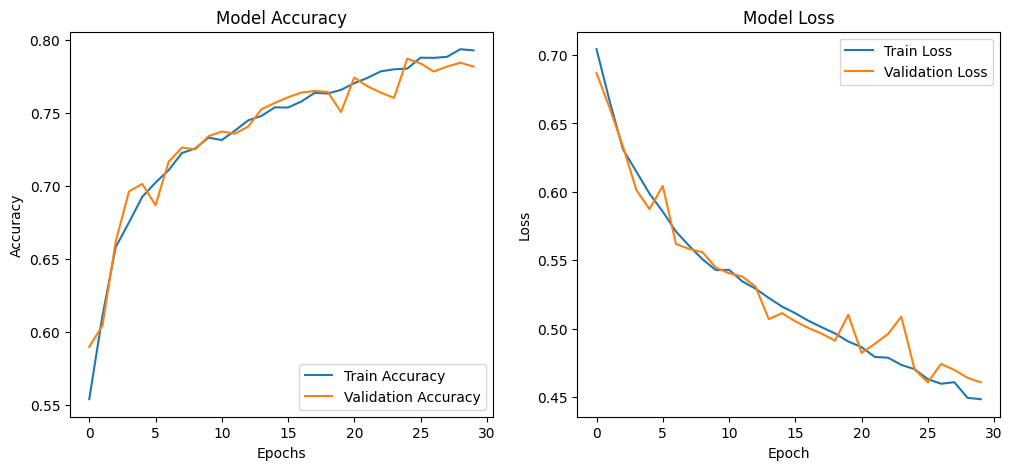

In [9]:
def plot_history(history):
 plt.figure(figsize=(12, 5))
 plt.subplot(1, 2, 1)
 plt.plot(history.history['accuracy'], label='Train Accuracy')
 plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
 plt.title('Model Accuracy')
 plt.ylabel('Accuracy')
 plt.xlabel('Epochs')
 plt.legend(loc='lower right')
 plt.subplot(1, 2, 2)
 plt.plot(history.history['loss'], label='Train Loss')
 plt.plot(history.history['val_loss'], label='Validation Loss')
 plt.title('Model Loss')
 plt.ylabel('Loss')
 plt.xlabel('Epoch')
 plt.legend(loc='upper right')
 plt.show()
plot_history(history)

In [10]:
from pickle import dump
import pickle
with open("cat_dog_model.pkl", "wb") as f:
 pickle.dump(model, f)